**Name:** Omar Khaled Mahmoud Safwat<br>
**Group:** Alex. G3


# Loading Dataset

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('tmdb-movies.csv')

# Data exploration

In [3]:
display(movies.head())
display(movies.info())
movies.drop_duplicates(inplace=True)
display(movies.shape)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

None

(10865, 21)

# Research Questions
1. Are movies with higher votes more popular?
2. Which director is most successfull in his career?
3. Which production company should one invest in?

## Research Q1:
* Are movies with higher votes more popular?

The first task at hand is to check if either of the columns ```vote_average```, ```vote_count``` or ```popularity``` require cleaning.

#### Missing values
None of the three columns have any missing values.
#### Data types
Data types are consistent for the 3 columns
#### Distribution and outliers
The mean and median of ```vote_average``` column are almost equal, suggesting that no extreme values are present.<br>

The two columns ```populariy``` and ```vote_count``` both have extreme values that are 10 times larger in comparison to their 75% quantile. These values will be assessed further through visual analysis.

In [4]:
# Create a new dataset with columns relevant to the first question
rating_popularity = movies[['popularity', 'vote_average', 'vote_count']]
rating_popularity.describe()

,popularity,vote_average,vote_count
count,10865.000000,10865.000000,10865.000000
mean,0.646446,5.975012,217.399632
std,1.000231,0.935138,575.644627
min,0.000065,1.500000,10.000000
25%,0.207575,5.400000,17.000000
50%,0.383831,6.000000,38.000000
75%,0.713857,6.600000,146.000000
max,32.985763,9.200000,9767.000000


## Visual Analysis
From the scatter plot below, the large values in ```vote_counts``` do not seem to be outliers. The plot also shows that there are many movies with vote counts close to ```0```, a minimum value limit needs to be set, therefore, for the ```vote_count``` to ensure the integrity of the ```vote_average``` value.


It can also be seen that for larger vote counts, there is an upward trend; ```vote_average``` increases as ```vote_count``` increases, in other words, mor people tend to vote for good movies.

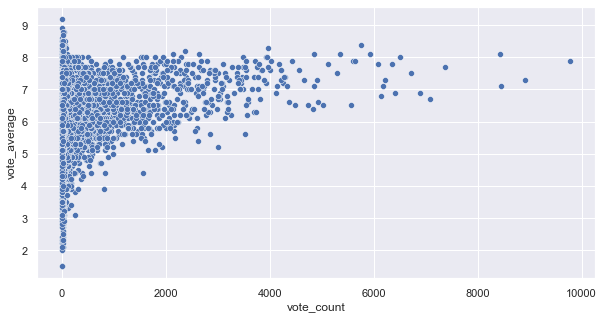

In [5]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 5]
sns.scatterplot(x='vote_count', y='vote_average', data=rating_popularity)
plt.show()

The upward trend started around a ```vote_average``` close to ```3```. The next code cell zooms in on this value to determine minimum ```vote_count``` value to consider in the analysis.


Limit the analysis to vote counts that are equal to or higher than ```200 votes```.

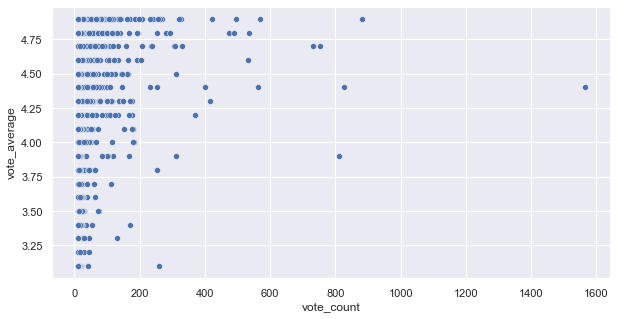

In [6]:
# Zooming in on votes with lower counts to identify a min vote count
sns.scatterplot(x='vote_count', y='vote_average', data=rating_popularity[((rating_popularity.vote_average > 3) & (rating_popularity.vote_average < 5))])
plt.show()

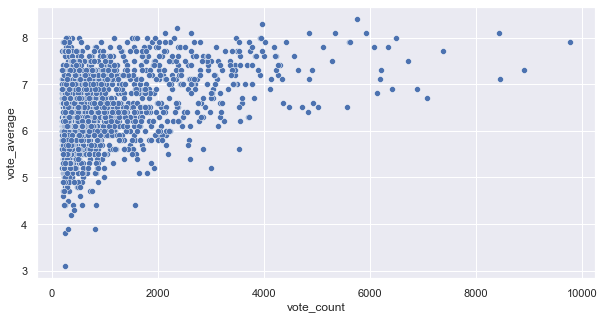

In [7]:
# Replot vote_average against counts with limits
rating_popularity = rating_popularity.query('vote_count >= 200')
sns.scatterplot(x='vote_count', y='vote_average', data=rating_popularity)
plt.show()

The three movies with extreme ```popularity``` values, higher than ```20```, are indeed popular on modern standards. They will be removed inorder to zoom in on the rest of the data and see if there is an association between the two features.

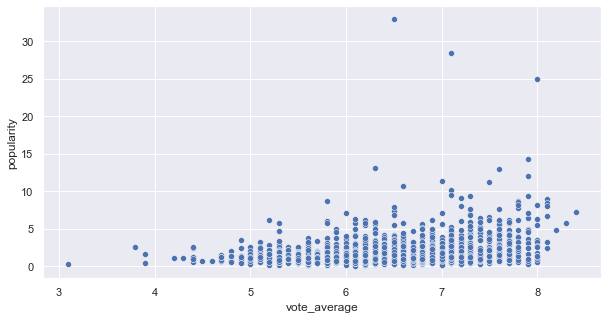

,original_title,vote_average
0,Jurassic World,6.5
1,Mad Max: Fury Road,7.1
629,Interstellar,8.0


In [8]:
sns.scatterplot(x='vote_average', y='popularity', data=rating_popularity)
plt.show()

# Which movies have popularity higher than 25
display(movies.query('popularity >= 20')[['original_title', 'vote_average']]) 

With the three extreme values removed, movies with higher votes still tend to have larger popularity values. 

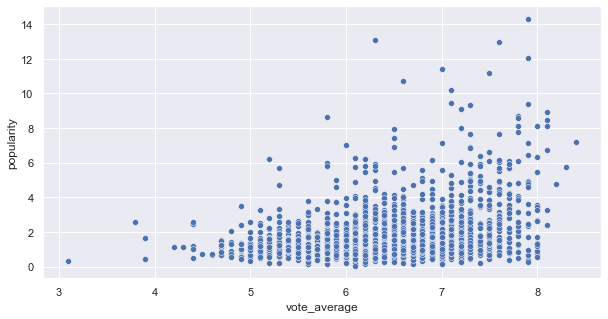

In [9]:
sns.scatterplot(x='vote_average', y='popularity', data=rating_popularity.query('popularity < 20'))
plt.show()

## Hypothesis testing
Although the plot shows a pattern, it is best to refine the question and formulate a null hypothesis then test it.

**Refined research question:** Are movies with ratings ```7``` more popular on average?

### Null-Hypothesis

**Difference** in mean values of popularity for ratings less than ```7``` and those larger than or equal to ```7``` is **statistically insignificant.**


To answer test the hypothesis, two bootstrapped samples will be drawn,
1. for movies with rating less than ```7```
2. For movies with rating larger ```7```
and the mean popularity of both sample arrays will then be subtracted. This will be repeated a ```1000``` times, giving us a ```1000``` bootstrapped replicate of the difference in means. The average of these replicates will be taken and compared to the null-hypothesis.


### Result

The result of the bootsrapped hypothesis testing is; the probability of seeing value equal to or higher than the observed difference in means is ```0.000```, thus **successfully rejecting the null-hypothesis.**

In [10]:
# Split the dataset into two datasets based on `vote_average`
less_than_7 = rating_popularity.query('vote_average < 7 and popularity < 20')
more_than_7 = rating_popularity.query('vote_average >= 7 and popularity < 20')

# Calculate the actual observed difference in means
actual_diff_means = more_than_7.popularity.mean() - less_than_7.popularity.mean()

# Draw a 1000 bootstrapped replicates for difference in means
# Array to store bootstrap replicates
bs_replicates = []
for i in range(1000):
    # Bootstrap popularity with replacement and form two arrays
    more_than_7_bs = more_than_7.popularity.sample(n=more_than_7.shape[0], replace=True)
    less_than_7_bs = less_than_7.popularity.sample(n=less_than_7.shape[0], replace=True)

    # Take their mean `popularity` and subtract them.
    # Append to bootstrap replicates
    bs_replicates.append(more_than_7_bs.mean() - less_than_7_bs.mean())

bs_replicates =np.array(bs_replicates)
# Center the replicates to zero "Null-hypothesis" and calculate the portion having a difference equal to or greater than what was observed
stat_significance = ((bs_replicates - bs_replicates.mean()) >= actual_diff_means).sum() / len(bs_replicates)

print(
    "Probability of the observed mean difference in popularity {:.3f} or higher is : {:.3f}"
    .format(actual_diff_means, stat_significance))

Probability of the observed mean difference in popularity 0.947 or higher is : 0.000


## Research Q2
* Which director is most successfull in his career?

The most successfull director is the one with:
1. Highest profit from his movies
2. Highest movie rankings.

In [11]:
# Create a dataset for this task with relevant columns
director_career = movies[['director', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average', 'original_title', 'release_date']]

# Drop Null values from `director`
director_career.dropna(subset=['director'], inplace=True)
# Convert date column to datetime object
director_career.release_date = pd.to_datetime(director_career.release_date)
director_career['profit'] = director_career.revenue_adj - director_career.budget_adj
display(director_career.info())
display(director_career.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   director        10821 non-null  object        
 1   budget_adj      10821 non-null  float64       
 2   revenue_adj     10821 non-null  float64       
 3   vote_count      10821 non-null  int64         
 4   vote_average    10821 non-null  float64       
 5   original_title  10821 non-null  object        
 6   release_date    10821 non-null  datetime64[ns]
 7   profit          10821 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 760.9+ KB


None

,budget_adj,revenue_adj,vote_count,vote_average,profit
count,1.082100e+04,1.082100e+04,10821.000000,10821.000000,1.082100e+04
mean,1.762011e+07,5.157685e+07,218.211810,5.971509,3.395673e+07
std,3.435943e+07,1.448953e+08,576.672383,0.933671,1.254551e+08
min,0.000000e+00,0.000000e+00,10.000000,1.500000,-4.139124e+08
25%,0.000000e+00,0.000000e+00,17.000000,5.400000,0.000000e+00
50%,0.000000e+00,0.000000e+00,38.000000,6.000000,0.000000e+00
75%,2.099042e+07,3.398486e+07,146.000000,6.600000,1.320481e+07
max,4.250000e+08,2.827124e+09,9767.000000,9.200000,2.750137e+09


Almost half the dataset contains records with both ```budjet_adj``` and ```revenue_adj``` set to zero, therefore they will only be removed from the dataset when relevant to the analysis to preserve as much of the dataset as possible.

In [12]:
# Find out how many records with budget and revenue equal to zero
director_career.query('budget_adj == 0 and revenue_adj == 0').shape

(4661, 8)

There are about ```5000``` unique director, 75% of them directed or co-directed no more than ```2``` movies, therefore, the analysis will narrow down the top directors who've directed atleast 10 movies or more.

Number of unique directors: 5067


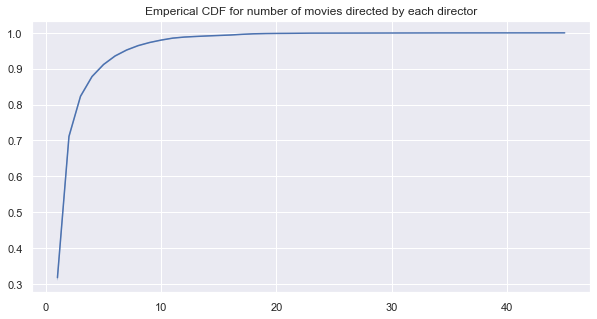

In [13]:
# How many unique director in the dataset
print("Number of unique directors:", len(director_career.director.unique()))

# Groupby director and get a count of the movies each of them directed
top_directors = director_career.groupby('director').original_title.count()

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

ecdf_x, ecdf_y = ecdf(top_directors.values)
sns.lineplot(x=ecdf_x, y=ecdf_y)
plt.title('Emperical CDF for number of movies directed by each director')

# Pick the top directors
top_directors = top_directors[top_directors > 10]
director_career = director_career[director_career.director.isin(top_directors.index.values)]


We can now compare the selected directors based on the profits their movies made, and ratings.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Peter Jackson'),
  Text(1, 0, 'Steven Spielberg'),
  Text(2, 0, 'Chris Columbus'),
  Text(3, 0, 'Michael Bay'),
  Text(4, 0, 'Roland Emmerich'),
  Text(5, 0, 'Robert Zemeckis'),
  Text(6, 0, 'William Friedkin'),
  Text(7, 0, 'Mike Newell'),
  Text(8, 0, 'Sam Raimi'),
  Text(9, 0, 'John Badham')])

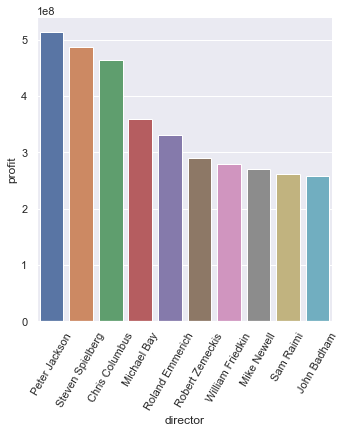

In [14]:
# Compare directors based on profits
# Consider data with budget and revenue larger than 0
top_directors_profits = director_career.query('budget_adj > 0 and revenue_adj > 0').groupby('director').agg({'profit':'mean'}).reset_index()

# Plot the 10 directors with the largest profits_per_movies 
sns.catplot(x='director', y='profit', data=top_directors_profits.nlargest(10, columns='profit'), kind='bar')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Francis Ford Coppola'),
  Text(1, 0, 'Quentin Tarantino'),
  Text(2, 0, 'Wes Anderson'),
  Text(3, 0, 'Blake Edwards'),
  Text(4, 0, 'Gus Van Sant'),
  Text(5, 0, 'Martin Scorsese'),
  Text(6, 0, 'Alan Parker'),
  Text(7, 0, 'Norman Jewison'),
  Text(8, 0, 'Peter Jackson'),
  Text(9, 0, 'Rob Reiner')])

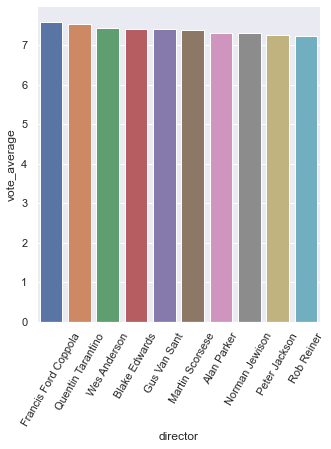

In [15]:
# Compare directors based on average movie ratings
top_directors_votes = director_career.query('vote_count > 200').groupby('director').agg({'vote_average':'mean'}).reset_index()
sns.catplot(x='director', y='vote_average', data=top_directors_votes.nlargest(10, columns='vote_average'), kind='bar')
plt.xticks(rotation=60)

The director ```Peter Jackson``` produced movies with largest profits on average and his average ratings are well above ```7```, existing in the top ```10``` directors of both criteria. However, the analysis cannot give a definitive answer to the research question, since almost 50% of the dataset had unfilled records for ```budget_adj``` and ```revenue_adj```, thus diminishing 50% of the data available to compute profits.

In [16]:
# Find out which directors exist in the top ten of both criteria
top_directors_profits_10 = top_directors_profits.nlargest(10, columns='profit')
top_directors_votes_10 = top_directors_votes.nlargest(10, columns='vote_average')

in_both = top_directors_profits_10.director.isin(top_directors_votes_10.director)
top_directors_profits_10[in_both].director

42    Peter Jackson
Name: director, dtype: object

# Research Q3
* Which production company should one invest in?

One should Ideally invest in companies with:
1. High activity over the latest years
2. Profitable productions


## Data cleaning
1. **Dates:** Dates column needs to be converted to datetime object. Some movies have invalid dates set after ```2015```
2. **Profit:** calculate profit as $revenue - budget$
3. **production_companies:** Split the string of companies into a list.
4. **budget_adj:** Some movies have budgets equal to zero, will be removed when relevant

As a general strategy, dirty rows with outlier columns will be removed when they are relavent to the analysis at hand, to make use of the data as much as possible. 

In [17]:
# Create a new data set for the new research question
company_invest = movies[['popularity', 'original_title', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj', 'production_companies']]

display(company_invest.head())
display(company_invest.info())
display(company_invest.describe())

,popularity,original_title,release_date,vote_count,vote_average,budget_adj,revenue_adj,production_companies
0,32.985763,Jurassic World,6/9/15,5562,6.5,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
1,28.419936,Mad Max: Fury Road,5/13/15,6185,7.1,1.379999e+08,3.481613e+08,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.112507,Insurgent,3/18/15,2480,6.3,1.012000e+08,2.716190e+08,Summit Entertainment|Mandeville Films|Red Wago...
3,11.173104,Star Wars: The Force Awakens,12/15/15,5292,7.5,1.839999e+08,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
4,9.335014,Furious 7,4/1/15,2947,7.3,1.747999e+08,1.385749e+09,Universal Pictures|Original Film|Media Rights ...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   release_date          10865 non-null  object 
 3   vote_count            10865 non-null  int64  
 4   vote_average          10865 non-null  float64
 5   budget_adj            10865 non-null  float64
 6   revenue_adj           10865 non-null  float64
 7   production_companies  9835 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 763.9+ KB


None

,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,217.399632,5.975012,1.754989e+07,5.136900e+07
std,1.000231,575.644627,0.935138,3.430753e+07,1.446383e+08
min,0.000065,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207575,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383831,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713857,146.000000,6.600000,2.085325e+07,3.370173e+07
max,32.985763,9767.000000,9.200000,4.250000e+08,2.827124e+09


The code cell below assigns the number of movies each unique company participated in. The most popular companies are extracted from the dataset for further analysis.

In [18]:
company_invest.dropna(subset=['production_companies'], inplace=True)
company_invest['release_date'] = pd.to_datetime(company_invest['release_date'])

# Collect unique values under `production_companies`
companies = company_invest['production_companies'].unique()
# Split the string into a list of companies
company_invest.production_companies = company_invest.production_companies.str.split('|')
# Gather all lists, concatenate them and extract the unique companies into an list
companies = list(set(np.concatenate(company_invest.production_companies.values).flat))

# For each company, count the number of movies it has co-produced and store it in a dictionary
company_activity = {}
for company in companies:
    company_activity[company] = company_invest.production_companies.apply(lambda x: company in x).sum()

The CDF plot below shows that atleast 90% of the production companies mentioned in the dataset co-produces ```1``` movie at most. Therefore, the dataset will be filtered to those companies who contributed to a larger number of movies, since they are most likely to be profitable to invest in. 

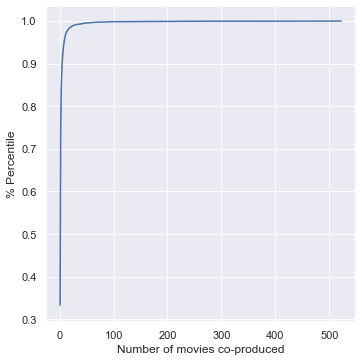

In [19]:
ecdf = ecdf(np.array(list(company_activity.values())))
sns.relplot(x=ecdf[0], y=ecdf[1], kind='line')
plt.ylabel('% Percentile')
plt.xlabel('Number of movies co-produced')
plt.show()

In [20]:
# Find the top 3 companies with max number of co-productions
min_production = np.percentile(
    list(company_activity.values()), 
    100 - 3 * 100 / len(list(company_activity.values())))
top_companies = [k for k, v in company_activity.items() if v > min_production]
top_companies

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures']

The top 3 companies will be compared based on recent activity, profit and average movie rating. 

In [21]:
# Filter rows with the top 3 companies
company_invest = company_invest[company_invest.production_companies.apply(lambda x: top_companies[0] in x or top_companies[1] in x or top_companies[2] in x)]
# Create a binary column for each of the 3 companies whether it co produced the film or not
for company in top_companies:
    company_invest[company] = company_invest.production_companies.str.contains(company, regex=False)

# Create profit column
company_invest['profits'] = company_invest['revenue_adj'] - company_invest['budget_adj']  
company_invest.head()

,popularity,original_title,release_date,vote_count,vote_average,budget_adj,revenue_adj,production_companies,Warner Bros.,Universal Pictures,Paramount Pictures,profits
4,9.335014,Furious 7,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09,"[Universal Pictures, Original Film, Media Righ...",False,True,False,1.210949e+09
6,8.654359,Terminator Genisys,2015-06-23,2598,5.8,1.425999e+08,4.053551e+08,"[Paramount Pictures, Skydance Productions]",False,False,True,2.627551e+08
8,7.404165,Minions,2015-06-17,2893,6.5,6.807997e+07,1.064192e+09,"[Universal Pictures, Illumination Entertainment]",False,True,False,9.961120e+08
11,6.189369,Jupiter Ascending,2015-02-04,1937,5.2,1.619199e+08,1.692686e+08,"[Village Roadshow Pictures, Dune Entertainment...",True,False,False,7.348699e+06
22,4.907832,San Andreas,2015-05-27,2060,6.1,1.012000e+08,4.328514e+08,"[New Line Cinema, Village Roadshow Pictures, W...",True,False,False,3.316514e+08


The three companies seem to've been active since the 70s, and still are. By looking at the graph, the three of them have comparable profits. Rows with zero profits will be removed to get a clearer picture of the trends.

Text(0.5, 0.98, 'Paramount Pictures')

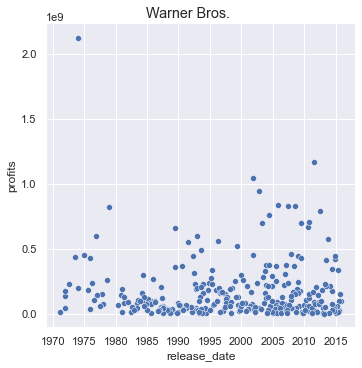

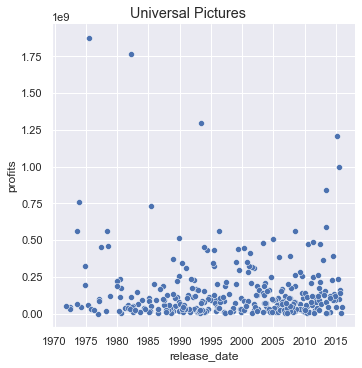

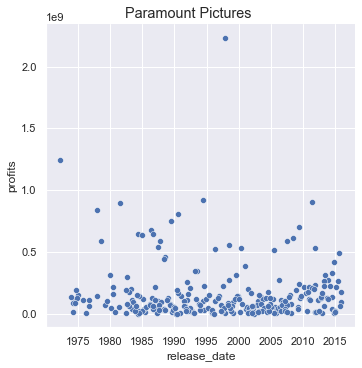

In [22]:
# Plot Date aganst profits for each company
c0 = sns.relplot(x='release_date', y='profits', data=company_invest[(company_invest[top_companies[0]] == True) & (company_invest.release_date.dt.year < 2016) & (company_invest.profits > 0)])
c0.fig.suptitle(top_companies[0])
c1 = sns.relplot(x='release_date', y='profits', data=company_invest[(company_invest[top_companies[1]] == True) & (company_invest.release_date.dt.year < 2016) & (company_invest.profits > 0)])
c1.fig.suptitle(top_companies[1])
c2 = sns.relplot(x='release_date', y='profits', data=company_invest[(company_invest[top_companies[2]] == True) & (company_invest.release_date.dt.year < 2016) & (company_invest.profits > 0)])
c2.fig.suptitle(top_companies[2])

The bar plot below shows ```Paramount Pictures``` made the highest profits across the years on average.


Text(0.5, 1.0, 'Average Profit 1970-2015 for each company')

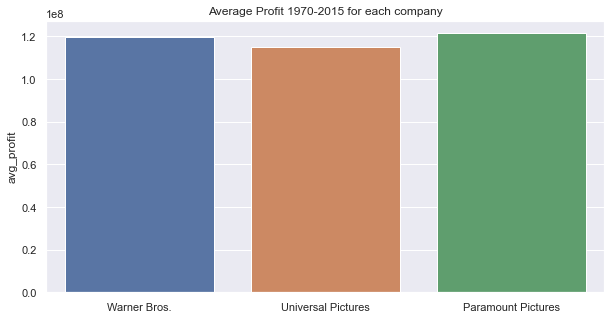

In [23]:
# Calculate the mean of profits for each company
company_profit = {}
for company in top_companies:
    company_profit[company] = company_invest[(company_invest[company] == True) & (company_invest.budget_adj > 0)].profits.mean()

company_profit = pd.DataFrame(list(company_profit.values()), index=top_companies, columns=['avg_profit'])
sns.barplot(x=company_profit.index.values, y='avg_profit', data=company_profit)
plt.title('Average Profit 1970-2015 for each company')

The three companies in the plot below have been producing movies with very similar ratings over the years on average.

Text(0.5, 1.0, 'Average Movie Rating 1970-2015 for each company')

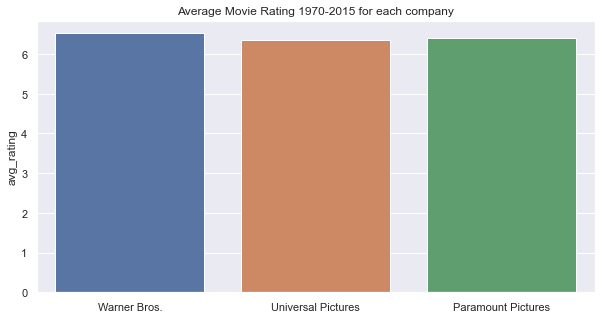

In [24]:
# Calculate the mean of profits for each company
company_profit = {}
for company in top_companies:
    company_profit[company] = company_invest[(company_invest[company] == True) & (company_invest.vote_count > 200)].vote_average.mean()

company_profit = pd.DataFrame(list(company_profit.values()), index=top_companies, columns=['avg_rating'])
sns.barplot(x=company_profit.index.values, y='avg_rating', data=company_profit)
plt.title('Average Movie Rating 1970-2015 for each company')

The analysis shows that ```Paramount Pictures``` is the most profitable company to invest in, since it has the highest profit on average from 1970-2015.